In [1]:
# %load init_setup/setup.py
# ==- INITIAL SETUP -===============================================================================
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 16})

# ==- PLOT PARAMETERS -=============================================================================
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
subplot_size = (7,4)

# ==- COLOR PALETTE -===============================================================================
c_red = "#e6194b" # red
c_gre = "#3cb44b" # green
c_yel = "#ffe119" # yellow
c_blu = "#4363d8" # blue
c_ora = "#f58231" # orange
c_pur = "#911eb4" # purple
c_cya = "#42d4f4" # cyan
c_mag = "#f032e6" # magenta
c_lim = "#bfef45" # lime
c_pin = "#fabebe" # pink
c_tea = "#469990" # teal
c_lav = "#e6beff" # lavender
c_bro = "#9A6324" # brown
c_bei = "#fffac8" # beige
c_mar = "#800000" # maroon
c_min = "#aaffc3" # mint
c_oli = "#808000" # olive
c_apr = "#ffd8b1" # apricot
c_nav = "#000075" # navy
c_gra = "#a9a9a9" # gray
c_whi = "#ffffff" # white
c_bla = "#000000" # black

accessibility_95    = [c_red, c_gre, c_blu, c_yel, c_ora, c_pur, c_cya,
                       c_mag, c_lim, c_pin, c_tea, c_lav, c_bro, c_bei,
                       c_mar, c_min, c_oli, c_apr, c_nav, c_gra, c_bla]
accessibility_99    = [c_red, c_gre, c_blu, c_yel, c_ora, c_cya, c_mag,
                       c_pin, c_tea, c_lav, c_bro, c_bei, c_mar, c_min,
                       c_nav, c_gra, c_bla]
accessibility_99_99 = [c_blu, c_yel, c_ora, c_pin, c_lav, c_mar, c_nav,
                       c_gra, c_bla]
accessibility_100   = [c_blu, c_yel, c_gra, c_bla]


In [2]:
# %load init_setup/setup2.py
matplotlib.rcParams.update({'font.size': 16})


In [3]:
def filter_spaces(word):
    if (word == ''):
        return False
    else:
        return True

# Read a file containing an array of arbitrary size
def file_to_nDarrs(filename):
    arr = []
    f = open(filename, 'r')
    
    for line in f:
        orig_arr  = line.replace("\n", "").split(" ")
        filt_arr  = list(filter(filter_spaces, orig_arr))
        float_arr = []
        for x in filt_arr:
            float_arr.append(float(x))
        if len(float_arr) == 1:
            arr.append(float_arr[0])
        else:
            arr.append(np.array(float_arr))
    f.close()
    return np.array(arr)

In [4]:
MDIR = "data/KF_tests/abm_vs_rk4/"
rk4_arr = []
abm_arr = []
for i in range(3):
    rk4_arr.append(file_to_nDarrs(MDIR + "rk4_" + str(i+1)))
    abm_arr.append(file_to_nDarrs(MDIR + "abm_" + str(i+1)))
names_arr = ["z      ", "x      ", "y      ", "tx     ", "ty     ", "q      ", "dx/dtx ", "dx/dty ", "dx/dq  ", 
             "dy/dtx ", "dy/dty ", "dy/dq  ", "dtx/dty", "dtx/dq ", "dty/dtx", "dty/dq "]

In [5]:
def get_diff_arr(arr1, arr2):
    diff_arr = []
    for i in range(len(arr1)):
        diff_arr.append([])
        for j in range(len(arr1[i])):
            rel_diff = np.abs((arr1[i][j] - arr2[i][j])/arr1[i][j])
            diff_arr[i].append(rel_diff)
    return diff_arr

def get_avg_arr(diff_arr):
    avg_arr = []
    for i in diff_arr[0]:
        avg_arr.append(0)
    for i in diff_arr:
        for j in range(len(i)):
            avg_arr[j] += i[j]
    for i in range(len(avg_arr)):
        avg_arr[i] /= len(diff_arr[0])
    
    return avg_arr

def error_plot(yscale, arrs, names):
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    index = np.arange(len(arrs[0]))

    for i in range(len(arrs)):
        plt.scatter(index, arrs[i], c=accessibility_99[i], label=names[i])
        plt.plot(   index, arrs[i], c=accessibility_99[i], alpha=baralpha)

    plt.yscale(yscale)
    plt.ylabel("relative error")
    plt.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()
    return

In [6]:
tests_arr = ["test 1", "test 2", "test 3"]
diff_arrs = []
avg_arrs  = []
for i in range(len(tests_arr)):
    print("\n" + tests_arr[i])
    diff_arrs.append(get_diff_arr(rk4_arr[i], abm_arr[i]))
    avg_arrs.append(get_avg_arr(diff_arrs[i]))
    for j in range(len(names_arr)):
        print(names_arr[j] + " : %16.12e" % avg_arrs[i][j])

t_diff_arrs = np.array(diff_arrs)
for i in range(len(t_diff_arrs)):
    t_diff_arrs[i] = np.array(t_diff_arrs[i]).transpose()


test 1
z       : 0.000000000000e+00
x       : 1.515340672480e-12
y       : 1.550381725199e-10
tx      : 3.528231772257e-11
ty      : 4.979900355674e-10
q       : 0.000000000000e+00
dx/dtx  : 6.906317745202e-05
dx/dty  : 5.017551839855e+00
dx/dq   : 2.046524434819e+01
dy/dtx  : 1.160239210011e+01
dy/dty  : 2.307438055451e-05
dy/dq   : 8.769636234490e+00
dtx/dty : 5.404179742642e+02
dtx/dq  : 2.568195280936e+02
dty/dtx : 3.577225625843e+03
dty/dq  : 3.520481404088e+03

test 2
z       : 0.000000000000e+00
x       : 1.174130093025e-07
y       : 6.723830854735e-08
tx      : 1.134727046673e-06
ty      : 3.518433315680e-07
q       : 0.000000000000e+00
dx/dtx  : 4.227119804226e-05
dx/dty  : 5.765999293900e+01
dx/dq   : 4.001256910002e+00
dy/dtx  : 6.902523402893e-01
dy/dty  : 1.391099841664e-05
dy/dq   : 1.655009383066e+00
dtx/dty : 7.836303738139e+02
dtx/dq  : 5.382876448963e+02
dty/dtx : 2.852796785539e+03
dty/dq  : 7.028604873808e+03

test 3
z       : 0.000000000000e+00
x       : 3.1373157

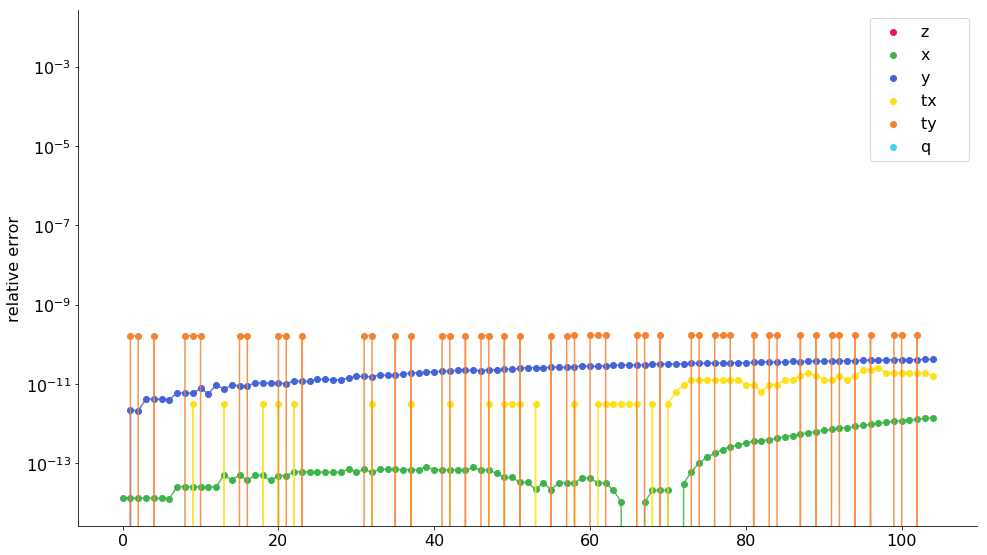

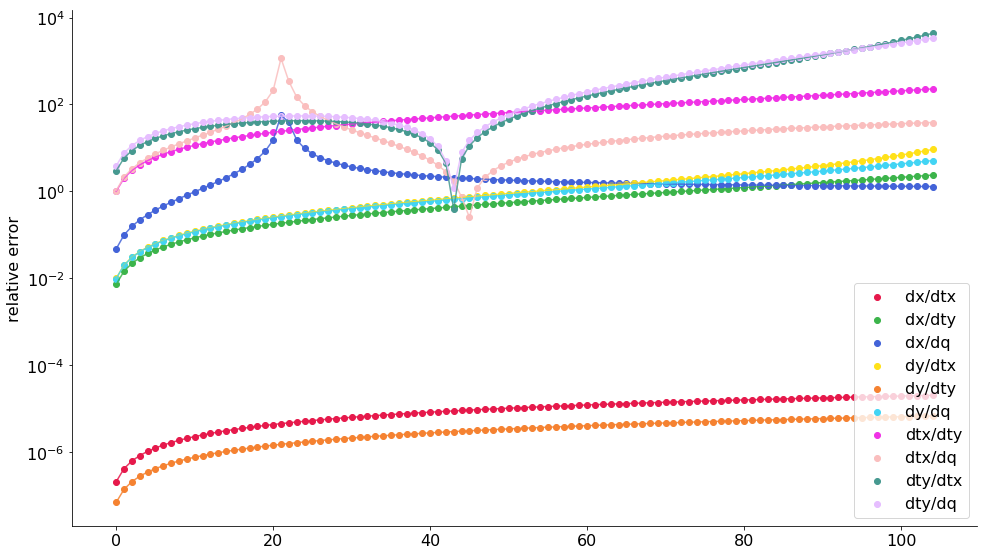

In [11]:
# for arr in t_diff_arrs:
#     error_plot("log", arr, names_arr)
error_plot("log", t_diff_arrs[0][0:6], names_arr[0:6])
error_plot("log", t_diff_arrs[0][6:], names_arr[6:])

In [8]:
for i in range(len(rk4_arr[0])):
    print("%2d: (%16.12f) - (%16.12f) = %32.28f" % (i, rk4_arr[0][i][13], abm_arr[0][i][13], diff_arrs[0][i][13]))

 0: ( -0.000112053570) - ( -0.000229481033) =   1.0479582488982723820214459920
 1: ( -0.000106688615) - ( -0.000336170003) =   2.1509454218709276318577394704
 2: ( -0.000101332206) - ( -0.000437502528) =   3.3175071901622272818599412858
 3: ( -0.000095984339) - ( -0.000533487150) =   4.5580645296729089821496927470
 4: ( -0.000090645008) - ( -0.000624132413) =   5.8854581931307228259697694739
 5: ( -0.000085314214) - ( -0.000709446849) =   7.3156934318119608562369649007
 6: ( -0.000079991946) - ( -0.000789438987) =   8.8689808971518218072560557630
 7: ( -0.000074678200) - ( -0.000864117355) =  10.5712129510352408345852381899
 8: ( -0.000069372981) - ( -0.000933490478) =  12.4561102109768064849504298763
 9: ( -0.000064076275) - ( -0.000997566875) =  14.5684280180144689609278429998
10: ( -0.000058788081) - ( -0.001056355053) =  16.9688643519423578709393041208
11: ( -0.000053508395) - ( -0.001109863529) =  19.7418579645306131453708076151
12: ( -0.000048237215) - ( -0.001158100807) =  23.00